In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 한글 폰트 오류 해결
from matplotlib import font_manager, rc 
font_path = "C:\\Users\\이혜림\\Desktop\\Bita5/malgun.ttf" #폰트 파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc("font",family=font_name)

## 앱실론-그리디 알고리즘

In [91]:
R = 0 # 총 리워드
ep = 0.15 # epsilon의 값
candidate_list = []

class candidate():
    def __init__(self):
        self.Q = 0
        self.N = 0
        self.P = random.randint(0,300) 
        self.P = float(self.P / 1000)

def bandit(candidate):
    global R
    candidate.N += 1
    rand_float = random.random()
    if rand_float < candidate.P:
        candidate.Q = candidate.Q + (1 - candidate.Q) / candidate.N
        R += 1
    else:
        candidate.Q = candidate.Q + (0 - candidate.Q) / candidate.N
    
    

def e_greedy_choice(candidate_list, e=ep):
    k = len(candidate_list) # 선택 후보군의 수
    
    random_flag = None
    # 엡실론보다 작으면 random_flag 는 True, 그렇지않으면 False
    # 랜덤하게 선택할것인지, 기대보상을 사용하여 선택할것인지 선택
    
    rand_num = random.random()
    if rand_num < e:
        random_flag = True
    else:
        random_flag = False

    if random_flag: # 엡실론보다 작으면, 무작위 추출
        choice_idx = random.randint(0,k-1)
        bandit(candidate_list[choice_idx])
    
    else: # 엡실론보다 크면 기대보상(Q)가 가장 큰 후보를 추출
        Q_list = [candidate_list[i].Q for i in range(k)]
        max_Q = max(Q_list)
        max_Q_list = [] # max_Q를 가진 후보의 인덱스를 저장
        for i in range(k):
            if candidate_list[i].Q == max_Q:
                max_Q_list.append(i)
        
        choice_idx = random.choice(max_Q_list)
        bandit(candidate_list[choice_idx])
        
    
 

In [92]:
candidate_list = []
R = 0

for i in range(5):
    cand = candidate()
    candidate_list.append(cand)
    
for i in range(5):
    print(candidate_list[i].P)    

data = np.zeros((1000,5))
for i in range(1000):
    e_greedy_choice(candidate_list, e=ep)
    data[i]=np.array([candidate_list[i].N for i in range(5)])


0.123
0.002
0.112
0.051
0.198


31
36
41
84
808


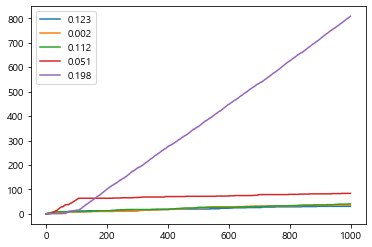

In [93]:
for i in range(5):
    print(candidate_list[i].N)
plt.plot(data)
plt.legend([candidate_list[i].P for i in range(5)])

In [76]:
data

array([[  0.,   1.,   0.,   0.,   0.],
       [  0.,   2.,   0.,   0.,   0.],
       [  0.,   3.,   0.,   0.,   0.],
       ...,
       [ 22., 923.,  13.,  20.,  20.],
       [ 22., 924.,  13.,  20.,  20.],
       [ 22., 925.,  13.,  20.,  20.]])

In [42]:
for i in range(5):
    print(candidate_list[i].N)

888
23
25
34
30


In [43]:
for i in range(5):
    print(candidate_list[i].P)

0.09
0.03
0.06
0.05
0.04


In [94]:
for i in range(5):
    print(candidate_list[i].Q)

0.09677419354838711
0.0
0.07317073170731708
0.04761904761904762
0.17574257425742573


In [ ]:
print(a,)